<img src = 'https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true' width="240" height="360">

# EDA on Wine Quality
<br><br>
![title](reso_wine_profiling.jpg)

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Standardize all column headers to Title Case](#section402)<br>
  - 4.3 [Create Total Acidity Column](#section403)<br>
  - 4.4 [Create Column "Grades" with Ordinal Values](#section404)<br>
  - 4.5 [Pandas Profiling after Data Processing](#section405)<br>
5. [Identifiying Related Variables](#section5)<br>
  - 5.1 [Pair Plot to understand pairwise relationship in the dataset](#section501)<br>
  - 5.2 [Relationship of pH to Total Acidity](#section502)<br>
  - 5.3 [Relationship of Grades to Acid Components](#section503)<br>
  - 5.4 [Relationship of Alcohol to Density](#section504)<br>
  - 5.5 [Relationship of pH to Volatile Acidity](#section505)<br>
  - 5.6 [Relationship of Density to Fixied Acidity](#section506)<br>
  - 5.7 [Relationship of Residual Sugar to Total Sulfur Dioxide](#section507)<br>
  - 5.8 [Correlation Between Variables](#section508)<br>
  - 5.9 [Bar Chart on Grades](#section509)<br>
6. [Analysis through questions](#section6)<br>
  - 6.1 [Does Residual Sugars impact Quality?](#section601)<br>
  - 6.2 [Does Alochol improves Quality?](#section602)<br>
  - 6.3 [Does the presence of Chlorides in the wine improves Quality?](#section603)<br>
7. [Conclusion](#section7)<br>
  - 7.1 [Perception of Acidity](#section701)<br>
  - 7.2 [Want for More Alcohol](#section702)<br>

<a id=section1></a>
## 1. Problem Statement

**Wine Producers** around the world do constantly worry about the **Wine Quality Ratings** that their **_Wines_** receive from critics which in turn is affecting the **increase or decrease in the sales of their wines**. The complex part is wine comes in various colours, flavours, degrees of sweetness and dryness.  This study is an attempt to understand various **chemical elements** and how the **proportion** of these elements decides the **Quality of the Wine**.

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np

import pandas as pd
pd.set_option('mode.chained_assignment',None)               # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)                  # To display all the date in each column
pd.options.display.max_columns = 50                         # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                           # To suppress all the warnings in the notebook. 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Install and update plotly using this command to the latest version (higher than version 4.0.0)

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\bahubali-desktop\anaconda3\lib\site-packages (4.1.1)


In [4]:
# Install chart_studio, please use this command. 

!pip install chart-studio

In [5]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

---

### Disclaimer: The images are only for illustration purpose. Please don't compare them with the data.

<a id=section3></a>
## 3. Loading Data

In this **Data Analysis**, we are using one dataset about Wine Quality.

In [6]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  7.4            0.70              0.00         1.9             0.076       
1  7.8            0.88              0.00         2.6             0.098       
2  7.8            0.76              0.04         2.3             0.092       
3  11.2           0.28              0.56         1.9             0.075       
4  7.4            0.70              0.00         1.9             0.076       

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  11.0                 34.0                  0.9978   3.51  0.56        
1  25.0                 67.0                  0.9968   3.20  0.68        
2  15.0                 54.0                  0.9970   3.26  0.65        
3  17.0                 60.0                  0.9980   3.16  0.58        
4  11.0                 34.0                  0.9978   3.51  0.56        

   alcohol  quality  
0  9.4      5        
1  9.8      5        
2  9.8      5        
3  9.8      6        
4  9.4      5

<a id=section301></a>
### Description of the Dataset

- This dataset provides a **nutrition analysis** of different menu items on the **McDonald's menu** in **India and US**, including breakfast, chicken wings, shake, snacks, hot beverages, cold beverages and desserts.

| **Column Name** | **Description**
|---|:---|
| **Fixed Acidity** | Acids involved with wine are **Fixed or Nonvolatile** (do not evaporate readily)
| **Volatile Acidity** | Amount of **Acetic Acid** in wine, which at too high of levels can lead to an _unpleasant, vinegar taste_.
| **Citric Acid** | Found in small quantities, **Citric Acid** can add _"Freshness"_ and _"Flavor"_ to the wines.
| **Residual Sugar** | The amount of sugar remaining after fermentation stops.
| **Chlorides** | The amount of salt in the wine.
| **Free Sulur Dioxide** | Free form of **$SO_{2}$** exists in equilibrium between molecular **$SO_{2}$** (as dissolved gas) and bisulfite ion; it prevents microbial growth and oxidation of wine.
| **Total Sulfur Dioxide** | **$SO_{2}$**, in low concentrations, undetectable in wine, but if concentrations are over 50 ppm, **$SO_{2}$** becomes evident in the nose and taste of wine.
| **Density** | Density of wine is close to that of water depending on the percent alcohol and sugar content.
| **pH** | Describes how acidic or basic a wine is on a scale of 0 (very acidic) to 14 (very basic); most wines are between **3-4 on the pH scale**.
| **Sulphates** | A wine additive which can contribute to sulfur dioxide gas **$SO_{2}$** levels, which acts as an antimicrobial and antioxidant.
| **Alcohol** | The percent alcohol content of the wine.
| **Quality** | Quality scored between 0 and 10.

In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **6497 samples (rows)** and **12 columns** in the dataframe.
  
  - There are **11 columns** with a **float** datatype and **1 column** with an **int** datatype.
  
  - There are **0 missing** values in the data.

In [8]:
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count  6497.000000    6497.000000       6497.000000  6497.000000      
mean   7.215307       0.339666          0.318633     5.443235         
std    1.296434       0.164636          0.145318     4.757804         
min    3.800000       0.080000          0.000000     0.600000         
25%    6.400000       0.230000          0.250000     1.800000         
50%    7.000000       0.290000          0.310000     3.000000         
75%    7.700000       0.400000          0.390000     8.100000         
max    15.900000      1.580000          1.660000     65.800000        

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000  6497.000000          6497.000000           6497.000000   
mean   0.056034     30.525319            115.744574            0.994697      
std    0.035034     17.749400            56.521855             0.002999      
min    0.009000     1.000000             6.000000              0.987110      
25%    0.038000     17.000000            77.000000             0.992340      
50%    0.047000     29.000000            118.000000            0.994890      
75%    0.065000     41.000000            156.000000            0.996990      
max    0.611000     289.000000           440.000000            1.038980      

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean   3.218501     0.531268     10.491801    5.818378     
std    0.160787     0.148806     1.192712     0.873255     
min    2.720000     0.220000     8.000000     3.000000     
25%    3.110000     0.430000     9.500000     5.000000     
50%    3.210000     0.510000     10.300000    6.000000     
75%    3.320000     0.600000     11.300000    6.000000     
max    4.010000     2.000000     14.900000    9.000000

- ```describe``` function gives us the following insights into the data:
  
  - Most of the columns except **Chlorides** column are all having almost **normal distribution** as the **mean values** are close to the **median values**.

  - The distribution of all columns except **total sulfur dioxide** and **density** are **positively (right) skewed** because the **means** of all columns lies to the **right** of the **median (50%)** values on a **distribution plot**. 
  
  - Of all the **Right Skewed Distributions**, **residual sugar** seems to be greatly skewed towards the right because its mean value of **5.44** seems to be far away from its median value of **3.00**.

---

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 
 

In [9]:
# To install pandas profiling please run this command.

!pip install pandas-profiling --upgrade

Requirement already up-to-date: pandas-profiling in c:\users\bahubali-desktop\anaconda3\lib\site-packages (2.3.0)


In [10]:
import pandas_profiling

In [11]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = df_wine.profile_report(title='Wine Quality-Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="Wine_Quality_profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.

df_wine.profile_report(title='Wine Quality-Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Observations from Wine Quality-Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 12
- Number of observations: 6497
- Missing cells: 0 (0.0%)


__Variables types__: 
- Numeric = 12
- Categorical = 0
- Text (Unique) = 0
- Rejected = 0

<br>

- The percentage of **top 5 values in Alcohol** column is approximately **23%** which translates to the amount of alcohol found in wines, lets us check **how it contributed to the wine quality?**


- Approx **28%** of the **Chloride** values ranged between **0.03 to 0.05**.
    - Although there are extreme values, they are less than **0.1%**
    - The peaking seen in histogram for values ranging between **0.03 - 0.05** is consistent with the **Kurtosis** of 50.


- **Citric Acid** almost has a normal distribution pattern.
    - There are 151 zero values, which is 2.3% of the total observations.


- **Density** values for **Wine** is approximately close to 1, which is the density of **Water**.


- **Fixed Acidity** has a **positive or right skewed distribution** with a **mean of 7.215** and **median of 7**.


- **Free Sulfur Dioxide** has a **minimum value of 1** and a **maximum value of 289**.
    - The Interquartile range of just 24 suggests that 50% of the values are concentrated towards the mean.
    - The maximum value of 289 seems to be an outlier, while mean is just **30** and median is **29**, though not pulling the mean towards the right.


- **pH** has a nearly perfect normal distribution with median almost same as that of mean.


- **Quality** also has a near normal distribution with both mean and median close to each other, the interquartile range of 1  tells us that most of the **Quality Scores** are around the median value of 6.
    - The lower Quality score is 3.
    - The highest Quality score is 9.
    - Quality score of 6 is the most frequency occuring value, which is approx. 47% of total Quality scores.
    - The Quality scores of 5, 6, 7 together contributes to 92% of the total scores.


- **Residual Sugar** has a **very positively or right skewed distribution** where Mean (5.44) lies to the right of Median at 3.
    - Taking min value of 0.6 and max value of 65.8 into consideration, the interquartile range of 6.3 with a mean of 5.44 and median of 3 tells us that there are extreme values on the right side.
    - The **Standard Deviation** of values for **Residual Sugar** from its mean is also high because of the same extreme values.
    

- **Sulphates** also has a pretty normal distribution of values where mean is close enough to median.
    - The kurtosis of 8.6 suggests that there are too many values centered around the mean.


- **total_sulfur_dioxide** has a pretty uneven distribution and the **standard deviation** being highest next to residual sugars, is suggestive of this.

<br><br>

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1.  Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.

- We are creating a new DataFrame to make sure original DF is intact.

In [12]:
df_QualityWine = df_wine
df_QualityWine.head(5)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0  7.4            0.70              0.00         1.9             0.076       
1  7.8            0.88              0.00         2.6             0.098       
2  7.8            0.76              0.04         2.3             0.092       
3  11.2           0.28              0.56         1.9             0.075       
4  7.4            0.70              0.00         1.9             0.076       

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0  11.0                 34.0                  0.9978   3.51  0.56        
1  25.0                 67.0                  0.9968   3.20  0.68        
2  15.0                 54.0                  0.9970   3.26  0.65        
3  17.0                 60.0                  0.9980   3.16  0.58        
4  11.0                 34.0                  0.9978   3.51  0.56        

   alcohol  quality  
0  9.4      5        
1  9.8      5        
2  9.8      5        
3  9.8      6        
4  9.4      5

---

<a id=section402></a>
### 4.2. Standardize all column headers to Title Case 

In [13]:
df_QualityWine.columns = map(str.title, df_QualityWine.columns)

# Renaming column Ph to pH
df_QualityWine = df_QualityWine.rename(columns={"Ph":"pH"})

In [14]:
df_QualityWine.head()

Fixed_Acidity  Volatile_Acidity  Citric_Acid  Residual_Sugar  Chlorides  \
0  7.4            0.70              0.00         1.9             0.076       
1  7.8            0.88              0.00         2.6             0.098       
2  7.8            0.76              0.04         2.3             0.092       
3  11.2           0.28              0.56         1.9             0.075       
4  7.4            0.70              0.00         1.9             0.076       

   Free_Sulfur_Dioxide  Total_Sulfur_Dioxide  Density    pH  Sulphates  \
0  11.0                 34.0                  0.9978   3.51  0.56        
1  25.0                 67.0                  0.9968   3.20  0.68        
2  15.0                 54.0                  0.9970   3.26  0.65        
3  17.0                 60.0                  0.9980   3.16  0.58        
4  11.0                 34.0                  0.9978   3.51  0.56        

   Alcohol  Quality  
0  9.4      5        
1  9.8      5        
2  9.8      5        
3  9.8      6        
4  9.4      5

---

<a id=section403></a>
### 4.3.  Create Total Acidity Column

Related Variables have known relations to one another and should be reflected in the data such as the relation of ```pH``` to any of the acid variables in the data.
<br>

For this purpose, we have added all the acid indicating components.  ```fixed acidity``` + ```volatile acidity``` + ```citric acid``` as ```Total Acidity``` and compared it to the ```pH``` variable.
<br>

In [15]:
Total_Acidity = df_QualityWine['Fixed_Acidity'] + df_QualityWine['Volatile_Acidity'] + df_QualityWine['Citric_Acid']
df_QualityWine.insert(3, 'Total_Acidity', Total_Acidity)
df_QualityWine.head(5)

Fixed_Acidity  Volatile_Acidity  Citric_Acid  Total_Acidity  \
0  7.4            0.70              0.00         8.10            
1  7.8            0.88              0.00         8.68            
2  7.8            0.76              0.04         8.60            
3  11.2           0.28              0.56         12.04           
4  7.4            0.70              0.00         8.10            

   Residual_Sugar  Chlorides  Free_Sulfur_Dioxide  Total_Sulfur_Dioxide  \
0  1.9             0.076      11.0                 34.0                   
1  2.6             0.098      25.0                 67.0                   
2  2.3             0.092      15.0                 54.0                   
3  1.9             0.075      17.0                 60.0                   
4  1.9             0.076      11.0                 34.0                   

   Density    pH  Sulphates  Alcohol  Quality  
0  0.9978   3.51  0.56       9.4      5        
1  0.9968   3.20  0.68       9.8      5        
2  0.9970   3.26  0.65       9.8      5        
3  0.9980   3.16  0.58       9.8      6        
4  0.9978   3.51  0.56       9.4      5

---

<a id=section404></a>
### 4.4.  Create Column "Grades" with Ordinal Values

In order Create Categorical Data to analyze Wine Quality, I have assigned a Ordinal Value based on Quality Score to each row.
<br>

I have created a list named **Grades** and used **for...loop** to pass through each value in column **Quality** and assigned the below **Ordinal Values**.
<br>

| Ordinal Value     | Quality Score|
|---|:---|
| Very Bad | < 3 |
| Bad | > 3 and <= 4 |
| Average | > 4 and <= 6 |
| Good | > 6 and <= 7 |
| Very Good | >7 |
<br>

Adding the **Grades** List as a column to **df_QualityWines** Dataframe

In [20]:
Grades = []

In [21]:
for column in df_QualityWine['Quality']:
    if column <= 3:        
        Grades.append('Very Bad')
    elif column >3 and column <=4:
        Grades.append('Bad')
    elif column >4 and column <=6:
        Grades.append('Average')
    elif column >6 and column <=7:
        Grades.append('Good')
    elif column >7:
        Grades.append('Very Good')

In [23]:
df_QualityWine.insert(13, 'Grades', Grades)
df_QualityWine.head(5)

Fixed_Acidity  Volatile_Acidity  Citric_Acid  Total_Acidity  \
0  7.4            0.70              0.00         8.10            
1  7.8            0.88              0.00         8.68            
2  7.8            0.76              0.04         8.60            
3  11.2           0.28              0.56         12.04           
4  7.4            0.70              0.00         8.10            

   Residual_Sugar  Chlorides  Free_Sulfur_Dioxide  Total_Sulfur_Dioxide  \
0  1.9             0.076      11.0                 34.0                   
1  2.6             0.098      25.0                 67.0                   
2  2.3             0.092      15.0                 54.0                   
3  1.9             0.075      17.0                 60.0                   
4  1.9             0.076      11.0                 34.0                   

   Density    pH  Sulphates  Alcohol  Quality   Grades  
0  0.9978   3.51  0.56       9.4      5        Average  
1  0.9968   3.20  0.68       9.8      5        Average  
2  0.9970   3.26  0.65       9.8      5        Average  
3  0.9980   3.16  0.58       9.8      6        Average  
4  0.9978   3.51  0.56       9.4      5        Average

---

<a id=section405></a>
### 4.5.  Pandas Profiling after Data Processing

Again, I will do Pandas Profiling after Data Processing our dataset, I will name the output ile as **Wine_Quality_profiling_After_Data_Processing.html**

In [59]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html
'''
profile = df_wine.profile_report(title='Wine Quality-Pandas Profiling before Data Preprocessing')
profile.to_file(output_file="Wine_Quality_profiling_before_preprocessing.html")
'''

# To output the pandas profiling report on the notebook.

df_QualityWine.profile_report(title='Wine_Quality_profiling_After_Data_Processing', style={'full_width':True})

#### Observations:

**Dataset Info:**
- Number of variables: 14
- Number of Observations: 6497
- Missing Cells: 0%

<br>

**Variable Types:**
- Numeric: 12
- Categorical: 1
- Rejected: 1
<br>

- Looking at the correlation plot, it seems that **Alcohol** is the only element which has a positive correlation to Quality.

---

<a id=section5></a>
### 5.  Identifiying Related Variables

<a id=section501></a>
### 5.1.  Pair Plot to understand pairwise relationship in the dataset

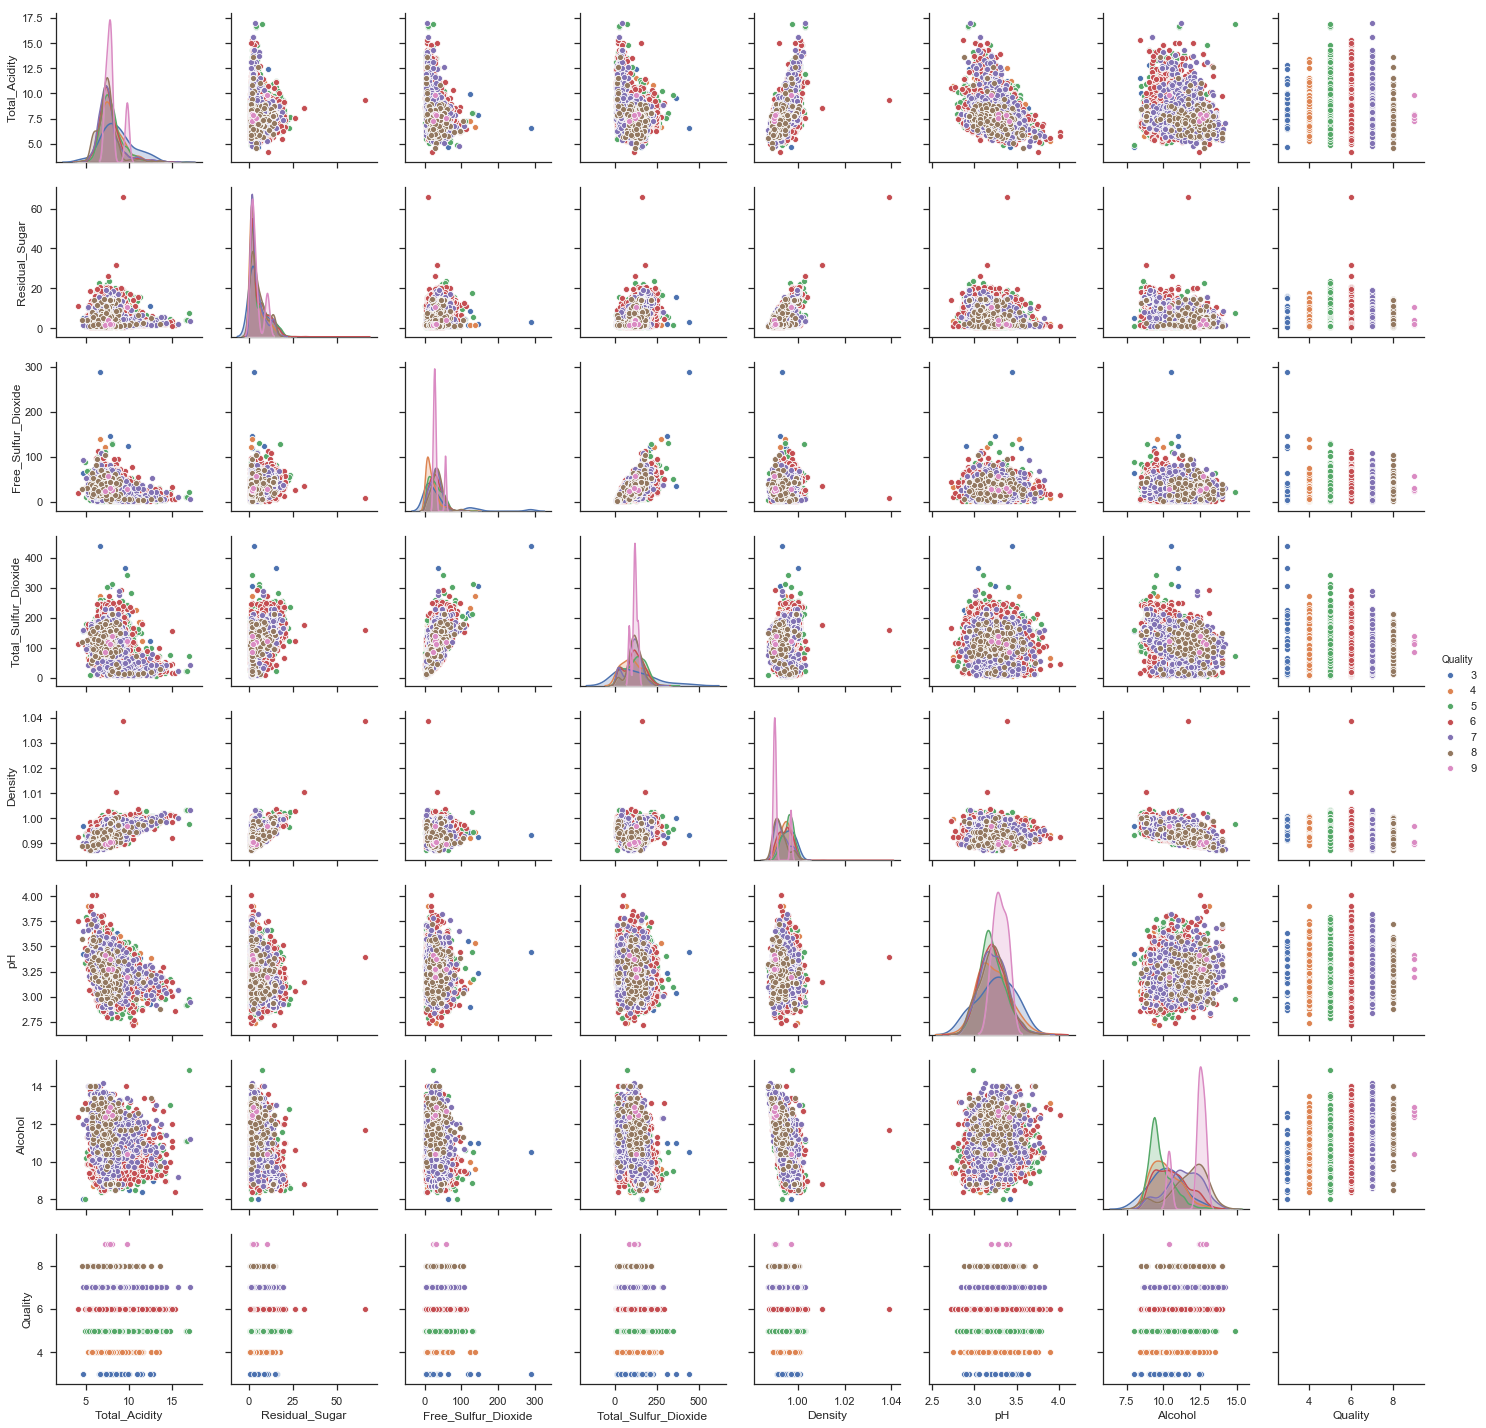

In [49]:
sns.set(style = 'ticks', color_codes=True)

sns.pairplot(data=df_QualityWine[['Total_Acidity','Residual_Sugar','Free_Sulfur_Dioxide','Total_Sulfur_Dioxide','Density','pH','Alcohol','Quality']], size = 2.5, diag_kind='kde', hue = 'Quality',)
plt.savefig('PairPlot.jpeg')

---

<a id=section502></a>
### 5.2.  Relationship of pH to Total Acidity

If the data is sound, ```pH``` should have an inverse relationship to ```Total Acidity```, which is the case from the below graph.

Text(0.5, 1.0, 'Regplot showing the variation in pH to variation in Total_Acidity present in the wine')

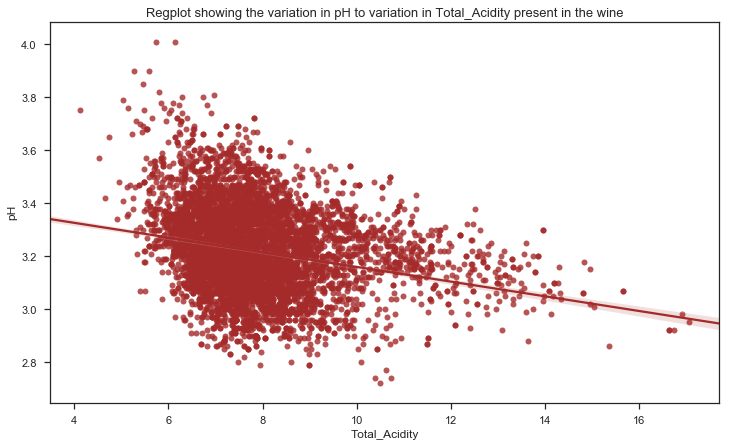

In [91]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_QualityWine, x = 'Total_Acidity', y='pH', color='brown')

plt.title('Regplot showing the variation in pH to variation in Total_Acidity present in the wine', fontsize=13)

---

---

<a id=section503></a>
### 5.3.  Relationship of Grades to Acid Components

The below graph shows how the Grades affected by the presence of each Acid Component in the wine.

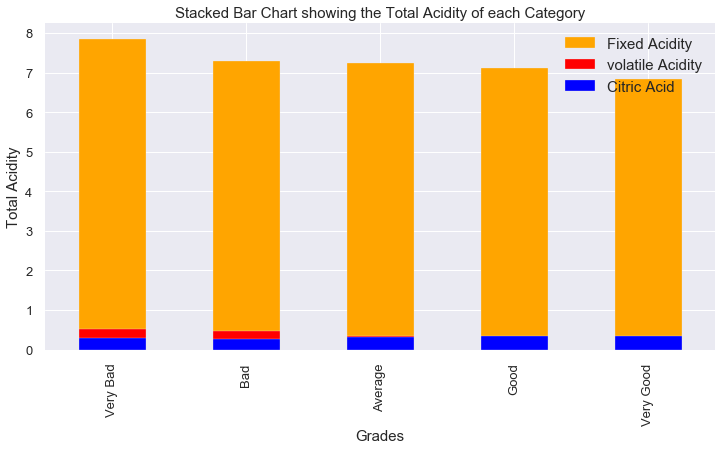

In [32]:
df_QualityWine.groupby(['Grades'])['Fixed_Acidity'].mean().loc[['Very Bad','Bad','Average','Good','Very Good']].plot(kind='bar',figsize=(12,6), color='orange', fontsize=13)
df_QualityWine.groupby(['Grades'])['Volatile_Acidity'].mean().loc[['Very Bad','Bad','Average','Good','Very Good']].plot(kind='bar',figsize=(12,6), color='red', fontsize=13)
df_QualityWine.groupby(['Grades'])['Citric_Acid'].mean().loc[['Very Bad','Bad','Average','Good','Very Good']].plot(kind='bar',figsize=(12,6), color='blue', fontsize=13)

plt.xlabel('Grades', fontsize=15)
plt.ylabel('Total Acidity', fontsize=15)
plt.title('Stacked Bar Chart showing the Total Acidity of each Category', fontsize=15)
plt.legend(labels=('Fixed Acidity', 'volatile Acidity', 'Citric Acid'), fontsize=15)

### Observations:

From the above plot, it is clear that the absence of **volatile acidity** increases the **quality** of wine.

In [33]:
df_QualityWine.head(2)

Fixed_Acidity  Volatile_Acidity  Citric_Acid  Total_Acidity  \
0  7.4            0.70              0.0          8.10            
1  7.8            0.88              0.0          8.68            

   Residual_Sugar  Chlorides  Free_Sulfur_Dioxide  Total_Sulfur_Dioxide  \
0  1.9             0.076      11.0                 34.0                   
1  2.6             0.098      25.0                 67.0                   

   Density    pH  Sulphates  Alcohol  Quality   Grades  
0  0.9978   3.51  0.56       9.4      5        Average  
1  0.9968   3.20  0.68       9.8      5        Average

---

<a id=section504></a>
### 5.4.  Relationship of Alcohol to Density

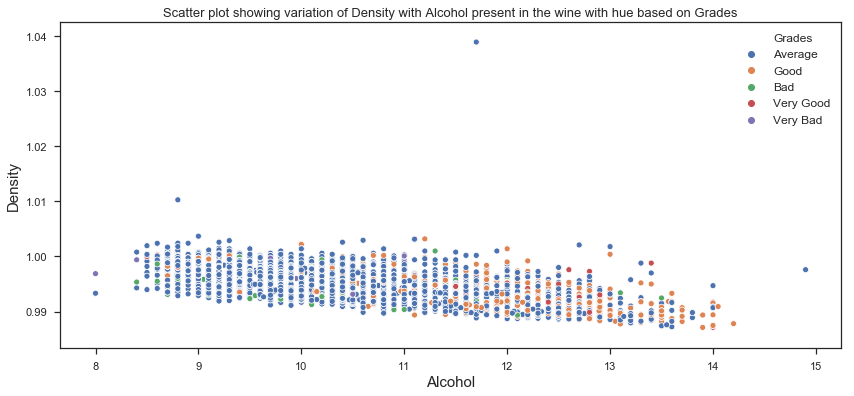

In [51]:
plt.figure(figsize =(14,6))
sns.scatterplot(data=df_QualityWine, x= 'Alcohol', y='Density', hue='Grades')

plt.xlabel('Alcohol', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Scatter plot showing variation of Density with Alcohol present in the wine with hue based on Grades', fontsize=13)
plt.grid(False)
plt.legend(fontsize=12)

#### Observations:

From the above chart, one can observe the following:
- Alcohol has less density compared to other liquids like water.
    - _**Alcohol** has a density of about 0.79 g/cc, at equal presure and temperature_.
    - _While density of **Water** is 1 g per cubic centimeter_.<br>
<br>

- The more alcohol a wine contains should decrease the overall density of the wine.
    - Chart above shows the low inverse relationship of alcohol level and density of wine.<br>
<br>

- For most of the wines **Density** is between 0.99 to 1.00.
<br>

- Most of the **Wines** with **Grades** including and above **Average** grade have alcohol % of **```11 or more```**.

---

<a id=section505></a>
### 5.5.  Relationship of pH to Volatile Acidity

Although ```pH``` to ```fixed acidity``` and ```citric acid``` seem to have a negative corerlation, as expected, ```pH``` seems to also have a positive correlation with ```volatile acidity```.  This was unexpected since acidic compounds encompass the lower numbers in the ```pH``` scale.  Let's take a closer took. 

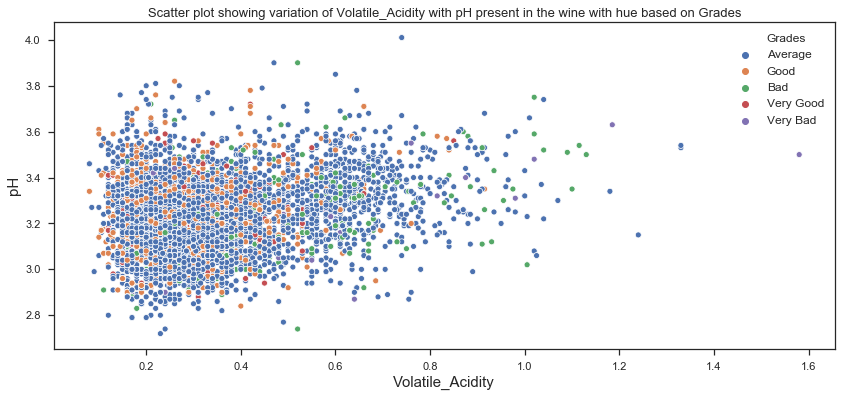

In [52]:
plt.figure(figsize =(14,6))
sns.scatterplot(data=df_QualityWine, x= 'Volatile_Acidity', y='pH', hue='Grades')

plt.xlabel('Volatile_Acidity', fontsize=15)
plt.ylabel('pH', fontsize=15)
plt.title('Scatter plot showing variation of Volatile_Acidity with pH present in the wine with hue based on Grades', fontsize=13)
plt.grid(False)
plt.legend(fontsize=12)

#### Observations.

One can see a slightly positive correlation between the **pH** and **Volatile Acidity**.

- Volatile acidity with values greater than 0.4 seems to decrease the Quality as most of the **Bad** grades can be found after that value.
- The percentage of Grades including and greater than Average Grade are mostly found with Volatile Acidity upto 0.4 and pH of upto 3.5

---

<a id=section506></a>
### 5.6.  Relationship of Density to Fixied Acidity

Another high correlation is between ```Density``` and ```fixed acidity```.  The three prime acids found in wine are **tartaric acid, malic acid** and **citric acid**. 

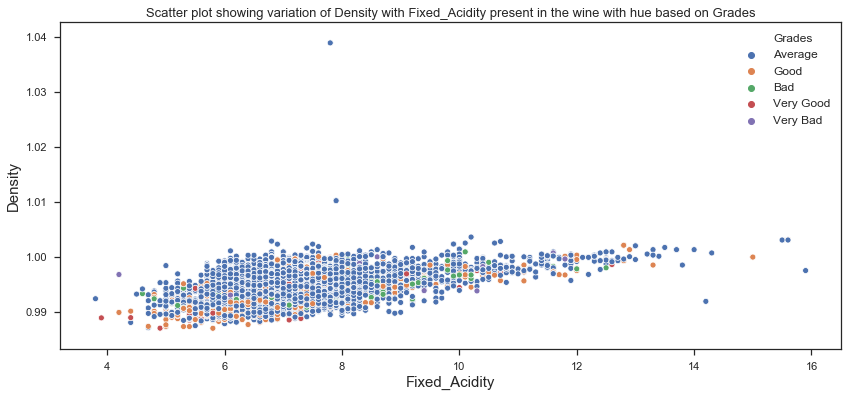

In [53]:
plt.figure(figsize =(14,6))
sns.scatterplot(data=df_QualityWine, x= 'Fixed_Acidity', y='Density', hue='Grades')

plt.xlabel('Fixed_Acidity', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Scatter plot showing variation of Density with Fixed_Acidity present in the wine with hue based on Grades', fontsize=13)
plt.grid(False)
plt.legend(fontsize=12)

#### Observations.

Again, one can see a slightly positive correlation between the **Density** and **Fixed Acidity**.

- Fixed acidity with values greater than 8 seems to decrease the Quality as most of the **Bad** grades can be found after that value.
- The percentage of Grades including and greater than Average Grade are mostly found with Fixed Acidity upto approx 8.2 and Density above 0.99.

---

<a id=section507></a>
### 5.7.  Relationship of Residual Sugar to Total Sulfur Dioxide

There are 2 types of sulfur dioxide, free and bound.  ```Free sulfer dioxide``` accounts for free compounds only while ```Total sulfer dioxide``` accounts for combination of both free and bound. 

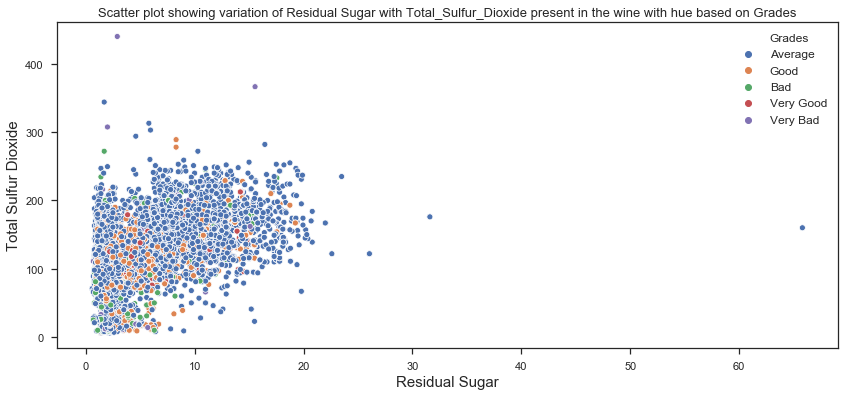

In [55]:
plt.figure(figsize =(14,6))
sns.scatterplot(data=df_QualityWine, y= 'Total_Sulfur_Dioxide', x='Residual_Sugar', hue='Grades')

plt.xlabel('Residual Sugar', fontsize=15)
plt.ylabel('Total Sulfur Dioxide', fontsize=15)
plt.title('Scatter plot showing variation of Residual Sugar with Total_Sulfur_Dioxide present in the wine with hue based on Grades', fontsize=13)
plt.grid(False)
plt.legend(fontsize=12)

#### Observations.

Again, one can see a slightly positive correlation between the **Total Sulfur Dioxide** and **Residual Sugar**.

- Total Sulfur Dioxide with values less than 100 and greater than 180 seems to affect the Quality as most of the **Bad** grades can be seen below that value.
- Total Sulfur Dioxide, **$SO_{2}$**, is a pungent and potent reductant.  They are used often to remove colors from objects in place of bleach.  Natural sugar has a yellowish color to it.  **$SO_{2}$** is the main agent responsible for removing the yellow color.

In [60]:
#plt.figure(figsize=(15,8))
#sns.violinplot(data=df_QualityWine, x='Grades', y='Residual_Sugar')
#plt.title('Scatter plot showing variation of Grades with Residual Sugar present in the wine with hue based on Grades', fontsize=13)

---

<a id=section508></a>
### 5.8.  Correlation Between Variables

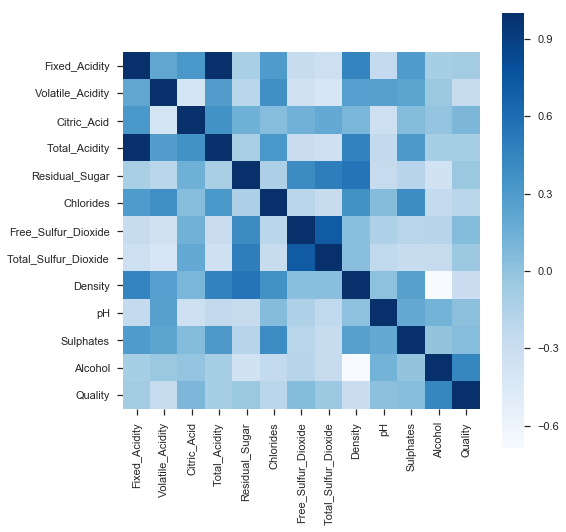

In [61]:
wine_corr = df_QualityWine.corr()
plt.figure(figsize=(8,8))
sns.heatmap(wine_corr, vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

**Observations:**

Compared to all other elements, Alcohol content in the wine has a high correlation to Quality.

---

<a id=section509></a>
### 5.9.  Bar Chart on Grades

Text(0.5, 1.0, 'Bar Chart showing Number of Items in each Category for column Grades')

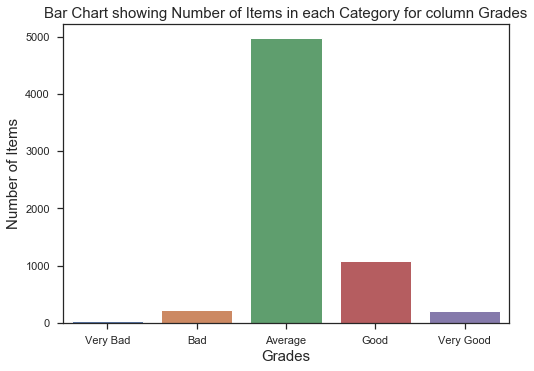

In [73]:
# Pandas plot.bar function to plot bar chart for Grades column

#df_QualityWine['Grades'].value_counts().loc[['Very Bad','Bad','Average','Good','Very Good']].plot.bar(figsize=(12,6), colormap='Dark2', fontsize=13)

sns.countplot(x=df_QualityWine['Grades'], order=['Very Bad','Bad','Average','Good','Very Good'])
plt.xlabel('Grades', fontsize=15)
plt.ylabel('Number of Items', fontsize = 15)
plt.title('Bar Chart showing Number of Items in each Category for column Grades', fontsize = 15)

#### Observations:
The above chart tells us that most of the wines are rated Average and above with Average Quality is being the one most rated .


---

<a id=section6></a>
### 6.  Analysis through questions

<a id=section601></a>
### 6.1.  Does Residual Sugars impact Quality?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

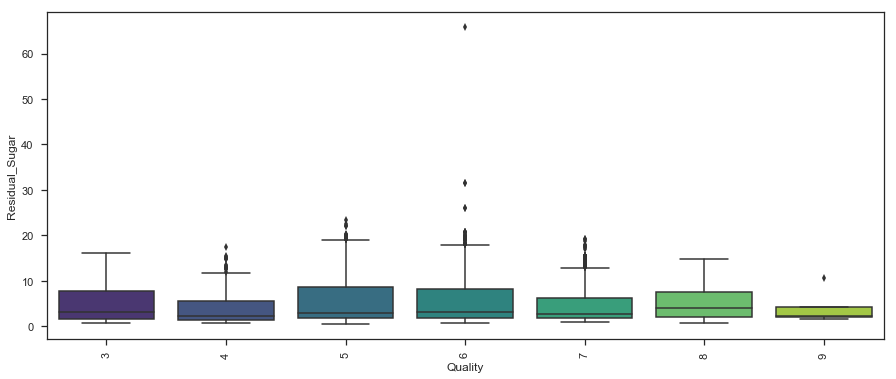

In [83]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_QualityWine, x='Quality', y='Residual_Sugar', palette='viridis', width=0.8)
plt.xticks(rotation=90)

There is no impact of Residual Sugars on Quality, as there are Wines with low sugar and rated both lower and higher for the same value. 

---

<a id=section602></a>
### 6.2.  Does Alochol improves Quality?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

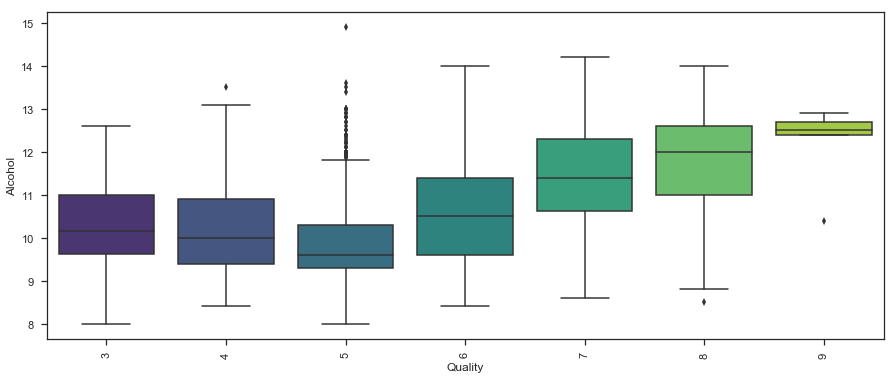

In [82]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_QualityWine, x='Quality', y='Alcohol', palette='viridis', width=0.8)
plt.xticks(rotation=90)

It is very clear that as the amount of alcohol present in the wine goes higher and higher, the quality of wine is getting better and better in most of the cases.

---

<a id=section603></a>
### 6.3.  Does the presence of Chlorides in the wine improves Quality?

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

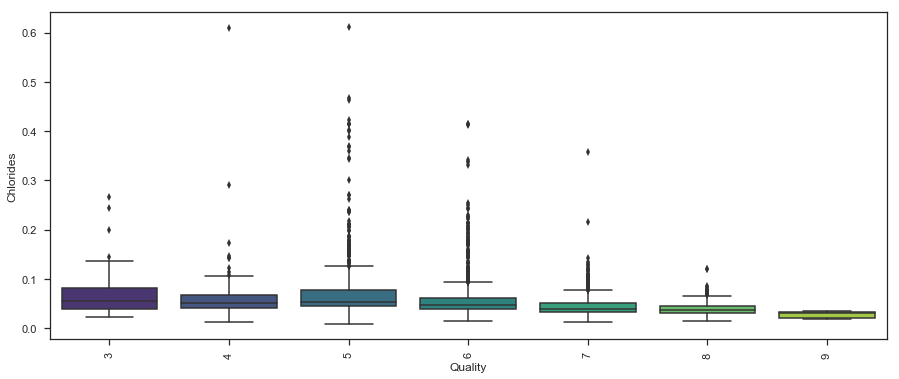

In [84]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_QualityWine, x='Quality', y='Chlorides', palette='viridis', width=0.8)
plt.xticks(rotation=90)

The lesser the chlorides, the better Quality of wine is evident.

---

<a id=section7></a>
### 7.  Conclusion

- Of all the elements, alcohol percentage in the wine seems to be the one increasing the quality of wine.
- Most of the samples tested were given Average rating, which is close to 5000 samples tested, though there were small changes in the other elements.
- As the outcome variable concerned is, ```Quality```, there were some distinct relationships noticed.

<a id=section701></a>
### 7.1.  Perception of Acidity

Text(0.5, 1.0, 'Regplot showing the variation in Quality to presence of Fixed Acidity in the wine')

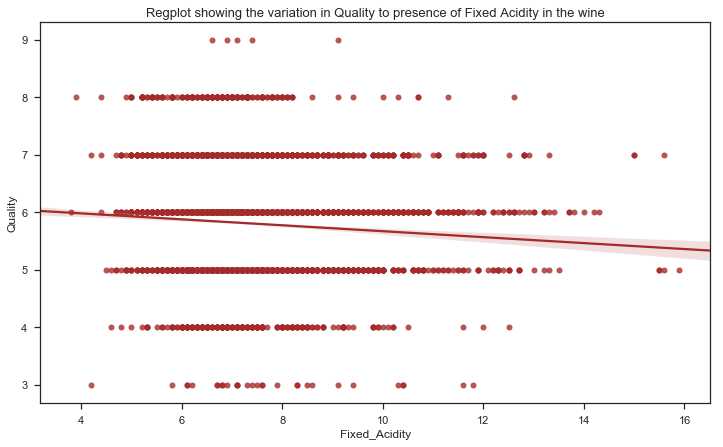

In [92]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_QualityWine, x = 'Fixed_Acidity', y='Quality', color='brown')

plt.title('Regplot showing the variation in Quality to presence of Fixed Acidity in the wine', fontsize=13)

It is important to have ideal amount of Acidity in the wine for improving the Quality of the wine.
- In most cases, wines with Quality rating equal to or higher than 7, tend to have the **Fixed Acidity** component **less than 10**, keeping other elements constant.
- The trend line above shows that Wine's Quality reducing by the incremental increase in **Fixed Acidity**.

<a id=section702></a>
### 7.2.  Want for More Alcohol

Text(0.5, 1.0, 'Regplot showing the variation in Quality to presence of Alcohol in the wine')

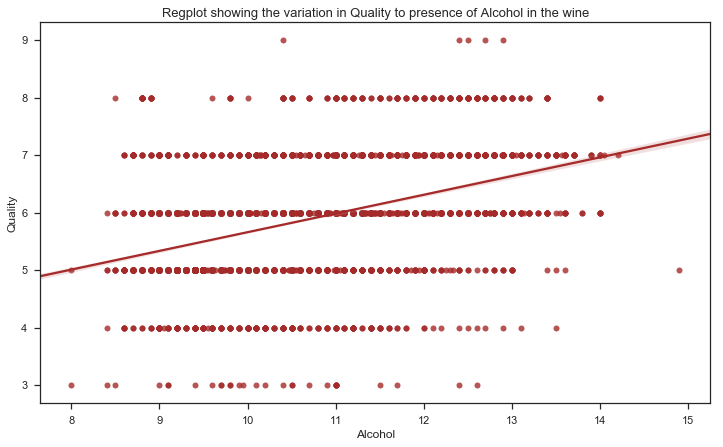

In [93]:
plt.figure(figsize=(12,7))
sns.regplot(data=df_QualityWine, x = 'Alcohol', y='Quality', color='brown')

plt.title('Regplot showing the variation in Quality to presence of Alcohol in the wine', fontsize=13)

Increase in the percentage of alcohol in the wine seems to improve the Wine Quality.

Though other physiochemical properties did not influence much the outcome variable, ```Quality```, if we have known other variables such as type of wine or the characteristics of grapes from which it was produced, would have helped in further narrowing down the analysis and accurately predicting the Quality of Wine. 